[<img src="images/quantum_algorithms_tutorials.png" alt="drawing" width="100" align="left" />][5]

<h2 align="center">
Quantum parallelism and Deutsch–Jozsa algorithm
</h2>

**[[Homepage][5]]**
**[[Open with the nbviewer][6]]**

<h3 align="left">
1. Quantum parallelism
</h3>

In this tutorial, we are going to introduce 3 separate problems and we will mainly follow the [[1]] book's approach of describing them. After giving descriptions we will implement them with Qiskit. Apart from addressing these problems, we will try to show some of the main "tools" of the quantum computers that are absent in the classical computation. This "tools" are important for understanding the specifics of the constructions of quantum algorithms. Namely, the quantum algorithms are widely using the following "tools": quantum interference, quantum entanglement, and quantum parallelism. How one can deduce from the name of this tutorial we will mainly focus on the quantum parallelism and how to gain some advantage from it, neverteless all mentioned "tools" are involved in this tutorial. Now, let's start discussing the quantum parallelism. Quantum parallelism enables to compute (with some caveats) the outputs of a function for given several inputs simultaneously. 

Suppose we have two registers one for the input the other one for the output. The initial state is given by $\left| x \right\rangle \left| 0 \right\rangle$ combined state of the two quantum registers, where $\left| x \right\rangle$ is the register that takes $x$ input and $\left| 0 \right\rangle$ is the output register where the value of the $f(x)$ function will be stored. After applying the circuit that corresponds to the given function the combined state is equal to $\left| x \right\rangle \left| f(x) \right\rangle$. Here is the circuit:

<img src="images/qparallel.png" alt="drawing" width="300"/>

The $U_{f(x)}$ is the unitary operator that acts on both  registers and does the described transformation. Let's see what happens when instead of one $\left| x \right\rangle$ bit string, we have a superposition state of all possible bit strings:

$$\frac{1}{2}\sum_{x} \left| x \right\rangle = \frac{1}{2} \left[ \left| 00 \right\rangle + \left| 01 \right\rangle + \left| 10 \right\rangle + \left| 11 \right\rangle \right]$$

The coefficient $\frac{1}{2}$ is for the normalization of the state (sum of all bit string probabilities in the superposition state must be unity). This superposition state will let us witness the quantum parallelism in action. Now let's write down the initial state of the two registers:

$$\left| \psi_{initial} \right\rangle = \frac{1}{2} \left| 0 \right\rangle \sum_{x}  \left| x \right\rangle = \frac{1}{2}  \left[ \left| 0 \right\rangle \left| 00 \right\rangle + \left| 0 \right\rangle \left| 01 \right\rangle + \left| 0 \right\rangle \left| 10 \right\rangle + \left| 0 \right\rangle \left| 11 \right\rangle \right]$$

After $U_{f(x)}$ unitary operator:

$$\left| \psi_{final} \right\rangle = \frac{1}{2}  \left[ \left| f(00) \right\rangle \left| 00 \right\rangle + \left| f(01) \right\rangle \left| 01 \right\rangle + \left| f(10) \right\rangle \left| 10 \right\rangle + \left| f(11) \right\rangle \left| 11 \right\rangle \right]$$

We are already there. So, we have applied one $U_{f(x)}$ unitary operator, but, in fact, the $f(x)$ function was evaluated 4 times for each term from the superposition state. This effect is called quantum parallelism, and this quantum computing "tool" has an important role in constructing quantum algorithms. Let's see how it works for a specific function. Suppose we have a function that for those $\left| x \right\rangle$ bit strings that have even number of $1$s the function $f(x) = 0$ and when the number of $1$s is odd the function $f(x) = 1$ (parity function). To make things more interesting we will use 3 qubits for the input register. Here is the circuit:

<img src="images/qparallel_example.png" alt="drawing" width="400"/>

where $i$ indices denote the input qubits and $o$ denotes the output qubit. Here the first 3 Hadamard gates are for preparing a 3 qubit superposition state with equal probabilities. The CNOT gates combined represent our given function $f(x)$ (unitary $U_{f(x)}$) that has an output $0$ if there are even number of $1$s in the input register and $1$ otherwise. Now let's go step by step and see how the quantum state changes and check if the given circuit implements the desired transformation. The initial $\left| \psi_{0} \right\rangle$ quantum state:

$$\left| \psi_{0} \right\rangle = \left| 0 \right\rangle_o \left| 000 \right\rangle_i$$

After 3 Hadamard gates we will have the $\left| \psi_{1} \right\rangle$ quantum state (omitting the qubit indices):

\begin{align*}
\left| \psi_{1} \right\rangle = \frac{1}{\sqrt{2^3}}\left| 0 \right\rangle &\big[ \left| 000 \right\rangle + \left| 001 \right\rangle + \left| 010 \right\rangle + \left| 011 \right\rangle +
\\
&+ \left| 100 \right\rangle + \left| 101 \right\rangle + \left| 110 \right\rangle + \left| 111 \right\rangle \big]
\end{align*}

Or in a more compact form:

$$\left| \psi_{1} \right\rangle = \frac{1}{\sqrt{2^3}}\left| 0 \right\rangle \sum_x \left| x \right\rangle,$$

where $x$ changes from $000$ to $111$. Here is the Hadamard gate and its actions on $\left| 0 \right\rangle$ and $\left| 1 \right\rangle$ states: 

\begin{align*}
&H \left| 0 \right\rangle = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix} 
\begin{pmatrix}
1 \\
0 
\end{pmatrix} = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 \\
1
\end{pmatrix} = 
\frac{1}{\sqrt{2}} \left( \left| 0 \right\rangle + \left| 1 \right\rangle \right) 
\\
&H \left| 1 \right\rangle = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix} 
\begin{pmatrix}
0 \\
1 
\end{pmatrix} = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 \\
-1
\end{pmatrix} = 
\frac{1}{\sqrt{2}} \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right) 
\end{align*}

If one applies Hadamard gates on $n$ qubits in the $\left| 0 \right\rangle$ initial state, it creates the $\frac{1}{\sqrt{2^n}}\sum_x \left| x \right\rangle$ superposition state with equal probabilities for each bit string. Here $x$ changes from $00...0$ to $11...1$.

After CNOT gates that implements the $f(x)$ function the quantum state $\left| \psi_2 \right\rangle$ will become:

$$\left| \psi_2 \right\rangle = \frac{1}{\sqrt{2^3}} \sum_x \left| f(x) \right\rangle  \left| x \right\rangle$$

Or in a more explicit form:

\begin{align*}
\left| \psi_2 \right\rangle = \frac{1}{\sqrt{2^3}} \big[ \left| 0 \right\rangle \left| 000 \right\rangle + \left| 1 \right\rangle \left| 001 \right\rangle + \left| 1 \right\rangle \left| 010 \right\rangle + \left| 0 \right\rangle \left| 011 \right\rangle +
\\
+ \left| 1 \right\rangle \left| 100 \right\rangle + \left| 0 \right\rangle \left| 101 \right\rangle + \left| 0 \right\rangle \left| 110 \right\rangle + \left| 1 \right\rangle \left| 111 \right\rangle \big]
\end{align*}

So, it is easy to check that the circuit implements the described $f(x)$ parity function. To check this calculation one should know the action of CNOT gate. For example, if CNOT is acting on an arbitrary two-qubit state $a \left| 00 \right\rangle + b \left| 01 \right\rangle + c \left| 10 \right\rangle + d \left| 11 \right\rangle$, where $a$, $b$, $c$ and $d$ are some arbitrary complex numbers that satisfy $\left| a \right|^2 + \left| b \right|^2 + \left| c \right|^2 + \left| d \right|^2 = 1$ (normalization). After applying CNOT gate controlled from the first qubit, we will obtain the following state $\left| 00 \right\rangle + b \left| 01 \right\rangle + c \left| 11 \right\rangle + d \left| 10 \right\rangle$, where we changed the second qubit state when the first qubit was in $\left|1\right\rangle$ state.

Also, it is interesting to note that the state $\left| \psi_2 \right\rangle = \frac{1}{\sqrt{2^3}} \sum_x \left| f(x) \right\rangle  \left| x \right\rangle$ is an example of the quantum entanglement. The state of the input register $\left| x \right\rangle$ has a correlation with the output register's $\left| f(x) \right\rangle$ state and we cannot describe two register (one for $\left| x \right\rangle$ and the other for $\left| f(x) \right\rangle$) with seperate quantum states for general $f(x)$ function. Here we should note that for specific $f(x)$ functions (e.g. $f(x) = 0$) they will not be entangled and we will be able to describe the quantum states of the registers separately, but our parity function is not one of that specific cases (we have entanglement). In our case, if we will measure $\left| x \right\rangle$ in the first register, then we will know with certanty that in the output register the state is the corresponding $\left| f(x) \right\rangle$, because of the correlations between two registers originated from the quantum entanglement. As was mentioned at the beginning like quantum parallelism the quantum entanglement is another example of the QC "tools" that is absent in the arsenal of classical computation.

Now let's write a code for this circuit:

  [1]: https://www.cambridge.org/am/academic/subjects/physics/quantum-physics-quantum-information-and-quantum-computation/quantum-computation-and-quantum-information-10th-anniversary-edition?format=HB
  [2]: https://quantumcomputing.stackexchange.com/questions/9566/implementing-four-oracles-for-the-deutsch-algorithm-preferably-on-ibm-q-experie
  [3]: https://www.youtube.com/watch?v=awpnsGl08bc&list=LLEPoMdv-DZViRaaObznY_-A&index=113&t=0s
  [4]: https://courses.edx.org/courses/course-v1:MITx+8.370.2x+1T2018/course/
  [5]: https://github.com/DavitKhach/quantum-algorithms-tutorials
  [6]: https://nbviewer.jupyter.org/github/DavitKhach/quantum-algorithms-tutorials/blob/master/quantum_parallelism_Deutsch_Jozsa.ipynb

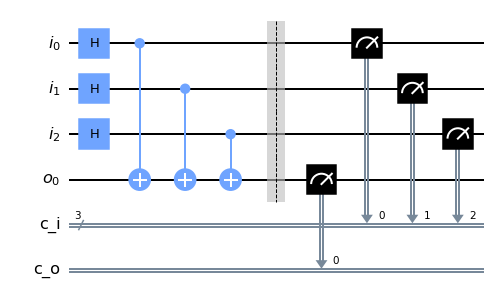

In [1]:
from qiskit import *
%matplotlib inline

# Initialization of quantum and classical registers 
# and the quantum circuit acting on those registers
input_register = QuantumRegister(3, "i")
output_register = QuantumRegister(1, "o")
classical_input_register = ClassicalRegister(3, "c_i")
classical_output_register = ClassicalRegister(1, "c_o")
parallelism_circuit = QuantumCircuit(input_register, output_register,
                                     classical_input_register, classical_output_register)

# Hadamard gates acting on qubits in the input register
parallelism_circuit.h(input_register[0])
parallelism_circuit.h(input_register[1])
parallelism_circuit.h(input_register[2])

# CNOTs controlled by qubits from the input register 
# and applied on the qubit from the output register
parallelism_circuit.cx(input_register[0], output_register[0])
parallelism_circuit.cx(input_register[1], output_register[0])
parallelism_circuit.cx(input_register[2], output_register[0])

# Just for a nice drawing of the circuit add a barrier
parallelism_circuit.barrier()

# Measurements on the qubits from the output register 
# and input register. The results are stored in the 
# classical bits from the classical register
parallelism_circuit.measure(output_register[0], classical_output_register[0])
parallelism_circuit.measure(input_register[0], classical_input_register[0])
parallelism_circuit.measure(input_register[1], classical_input_register[1])
parallelism_circuit.measure(input_register[2], classical_input_register[2])

# Draw the circuit 
parallelism_circuit.draw(output="mpl")

Now we will run this circuit on a quantum computer simulator and plot the results in the histogram.

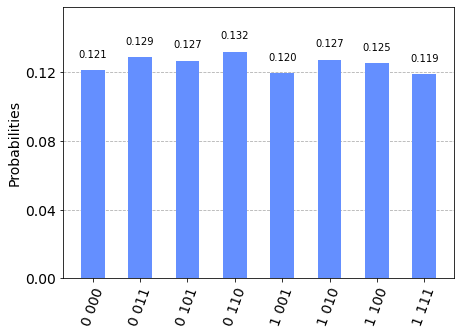

In [2]:
from qiskit.visualization import plot_histogram

# Simulator of a quantum computer
simulator = BasicAer.get_backend('qasm_simulator')

# The execution of the circuit with a given number  
# of shots (number of the circuit executions)
job = execute(parallelism_circuit, simulator, shots=8096)
result = job.result()
counts = result.get_counts()

# Plot the results in the histogram
plot_histogram(counts)

Note that the first bit in the histogram is the measurement result of the qubit from the output register and the rest bits are obtained by measuring the input register. One can notice that the output register is $0$ when we have an even number of $1$s in the input register and, otherwise, the output register is $1$ (as was expected because of the correlation/entanglement between the registers). Also, the probability of each measurement outcome is equal to $\approx 0.125 = \left|\frac{1}{\sqrt{2^3}}\right|^2$, and here we have an agreement with the presented formulas describing the superposition state. This procedure of the measurements is not the best thing that we can do with quantum parallelism. The number of repetitions (`shots`) of given circuit execution will demolish the possible advantage that possibly can be achieved with quantum parallelism. So we should use quantum parallelism more wisely in order to not lose the speedup that it can provide. In the next paragraphs, we will show how we can efficiently gain information about some specific $f(x)$ functions by using quantum parallelism.

<h3 align="left">
2. Deutsch's algorithm
</h3>

In the Deutsch algorithm, we are solving a problem with two qubits. The problem can be described in this way [[1]]: Alice and Bob live in different cities and they are playing a game. Alice prepares her qubits and sends them to Bob. Bob applies a function on Alice's qubits and sends them back to Alice. Bob is allowed to choose only one of the 4 possible functions, that are either constant ($f(0) = f(1)$) or balanced ($f(0) \ne f(1)$), and input and output of the function is one bit ($0$ or $1$). Alice should find out from the measurement result was the chosen function balanced or constant. In the course of this algorithm, we will use the concept of quantum parallelism. Here is the circuit for the algorithm (a modified version of the Fig. 1.19 from [[1]]):

<img src="images/Deutsch.png" alt="drawing" width="500"/>

where $\left| x \right\rangle$ is the input register with one qubit, $\left| y \right\rangle$ is the output register also with one qubit, $M$ denotes the measurement. The initial state is $\left| \psi_0 \right\rangle = \left| 0 \right\rangle \left| 1 \right\rangle$. Alice applies Hadamard gates on both input and output registers and obtains the $\left| \psi_1 \right\rangle$ state:

$$
\left| \psi_1 \right\rangle = \frac{1}{2} 
\left( \left| 0 \right\rangle + \left| 1 \right\rangle \right)
\left( \left| 0 \right\rangle - \left| 1 \right\rangle \right).
$$

Then Alice sends the qubits to Bob. Now Bob should make a decision which $f(x)$ function to use. 4 possible functions can be chosen. Two of them are constant functions ($f(0) = f(1) = 0$ or $f(0) = f(1) = 1$) and the other two are balanced ($f(0) = 0$ and $f(1) = 1$ or $f(0) = 1$ and $f(1) = 0$). After choosing one of them Bob acts the corresponding $U_{f(x)}$ circuit on the qubits. The result of the function is stored in the output register by mmodulo 2 addition $\left| y \oplus f(x)\right\rangle$. Let's rewrite the $\left| \psi_1 \right\rangle$ in this way:

$$
\left| \psi_1 \right\rangle = \frac{1}{2} 
\left( \left| 0 \right\rangle + \left| 1 \right\rangle \right)
\left( \left| 0 \right\rangle - \left| 1 \right\rangle \right) = 
\frac{1}{2} 
\left( \left| 0 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right) + \left| 1 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right) \right)
$$

After applying the circuit $U_{f(x)}$ one will obtain $\left| \psi_2 \right\rangle$ state that Bob will send back to Alice:

\begin{align*}
\left| \psi_2 \right\rangle = \frac{1}{2} 
\big( \left| 0 \right\rangle \left( \left| 0 \oplus f(0) \right\rangle - \left| 1 \oplus f(0) \right\rangle \right) + 
\left| 1 \right\rangle \left( \left| 0 \oplus f(1) \right\rangle - \left| 1 \oplus f(1) \right\rangle \right) \big)
\end{align*}

How one can see the $f(0)$ and $f(1)$ were calculated at the same time by executing the circuit once (quantum parallelism). Although the values of $f(0)$ and $f(1)$ are computed, but they are "hidden" in the quantum state. By saying "hidden" means that we don't know a direct way to extract the values from them efficiently. Now Bob sends the qubits back to Alice. Alice applies Hadamard gate on the input qubit and obtains the final $\left| \psi_3 \right\rangle$ quantum state before the measurement:

\begin{align*}
\left| \psi_3 \right\rangle = \frac{1}{\sqrt{2^3}} 
\big( &\left( \left| 0 \right\rangle + \left| 1 \right\rangle \right) \left( \left| 0 \oplus f(0) \right\rangle - \left| 1 \oplus f(0) \right\rangle \right) + 
\\
+ &\left( \left| 0 \right\rangle - \left| 1 \right\rangle \right) \left( \left| 0 \oplus f(1) \right\rangle - \left| 1 \oplus f(1) \right\rangle \right) \big)
\end{align*}

Let's regroup superposition states:

\begin{align*}
\left| \psi_3 \right\rangle = \frac{1}{\sqrt{2^3}} 
\big( 
& 
\left| 0 \right\rangle \left( \left| 0 \oplus f(0) \right\rangle - \left| 1 \oplus f(0) \right\rangle  + \left| 0 \oplus f(1) \right\rangle - \left| 1 \oplus f(1) \right\rangle \right) + 
\\
& 
\left| 1 \right\rangle \left( \left| 0 \oplus f(0) \right\rangle - \left| 1 \oplus f(0) \right\rangle - \left| 0 \oplus f(1) \right\rangle +  \left| 1 \oplus f(1) \right\rangle \right) 
\big)
\end{align*}

Here we are going to show that, when the function was balanced the terms in the first bracket cancel each other and final state of the first qubit becomes $\left| 1 \right\rangle$. Otherwise, if the function was constant the terms of the second bracket cancel each other and the final state of the first qubit will be $\left| 0 \right\rangle$. So, by just measuring the first qubit, Alice can understand was the function balanced or constant. To see this let's consider one of the examples. Suppose Bob has chosen a balanced function for which $f(0) = 0$ and $f(1) = 1$. In that case:

\begin{align*}
\left| \psi_3 \right\rangle = \frac{1}{\sqrt{2^3}} 
\big( 
& 
\left| 0 \right\rangle \left( \left| 0 \oplus 0 \right\rangle - \left| 1 \oplus 0 \right\rangle  + \left| 0 \oplus 1 \right\rangle - \left| 1 \oplus 1 \right\rangle \right) + 
\\
& 
\left| 1 \right\rangle \left( \left| 0 \oplus 0 \right\rangle - \left| 1 \oplus 0 \right\rangle - \left| 0 \oplus 1 \right\rangle +  \left| 1 \oplus 1 \right\rangle \right) 
\big)
\end{align*}

Note that $\left|1 \oplus 1\right\rangle = \left|0\right\rangle$. $\left|0 \oplus 1\right\rangle = \left|1\right\rangle$, $\left|1 \oplus 0\right\rangle = \left|1\right\rangle$ and $\left|0 \oplus 0\right\rangle = \left|0\right\rangle$. So:

\begin{align*}
\left| \psi_3 \right\rangle = \frac{1}{\sqrt{2^3}} 
\big( 
& 
\left| 0 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle  + \left| 1 \right\rangle - \left| 0 \right\rangle \right) + 
\\
& 
\left| 1 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle - \left| 1 \right\rangle +  \left| 0 \right\rangle \right) 
\big) =
\\
& = \frac{1}{\sqrt{2}}\left| 1 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right)
\end{align*}

Similar calculations can be done for the other functions:

\begin{align*}
&\text{f(0) = 0, f(1) = 0:} \;\; \left| \psi_3 \right\rangle = \frac{1}{\sqrt{2}}\left| 0 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right)
\\
&\text{f(0) = 1, f(1) = 1:} \;\; \left| \psi_3 \right\rangle = -\frac{1}{\sqrt{2}}\left| 0 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right)
\\
&\text{f(0) = 0, f(1) = 1:} \;\; \left| \psi_3 \right\rangle = \frac{1}{\sqrt{2}}\left| 1 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right)
\\
&\text{f(0) = 1, f(1) = 0:} \;\; \left| \psi_3 \right\rangle = -\frac{1}{\sqrt{2}}\left| 1 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right)
\end{align*}

One can see that if the function is constant (the first two cases) the qubit in the input register is in the $\left| 0 \right\rangle$ state and if the function is balanced (the last two cases) the qubit is in the $\left| 1 \right\rangle$ state. Here we encounter one more useful property of quantum computation called quantum interference. It arises from the fact that probability amplitudes are complex numbers and they can be subtracted from (added to) each other (in our example: destructive interference $ \left| 0 \right\rangle -  \left| 0 \right\rangle = (1 - 1) \left| 0 \right\rangle = 0$; constructive interference $ \left| 0 \right\rangle +  \left| 0 \right\rangle = (1 + 1) \left| 0 \right\rangle = 2 \left| 0 \right\rangle$). Like the quantum parallelism and quantum entanglement, quantum interference also is an important "tool" that is widely used in quantum algorithms.

Now we are ready to write the code. In the code, we will implement all 4 possible functions and let Bob choose what he likes (actually we will choose one of the circuits randomly in order to simulate free will of the imaginary person Bob). But, before that Alice should prepare the qubits:

  [1]: https://www.cambridge.org/am/academic/subjects/physics/quantum-physics-quantum-information-and-quantum-computation/quantum-computation-and-quantum-information-10th-anniversary-edition?format=HB
  [2]: https://quantumcomputing.stackexchange.com/questions/9566/implementing-four-oracles-for-the-deutsch-algorithm-preferably-on-ibm-q-experie
  [3]: https://www.youtube.com/watch?v=awpnsGl08bc&list=LLEPoMdv-DZViRaaObznY_-A&index=113&t=0s
  [4]: https://courses.edx.org/courses/course-v1:MITx+8.370.2x+1T2018/course/

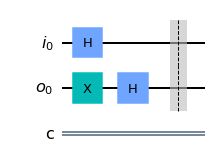

In [3]:
# Alice prepares the qubits
input_register = QuantumRegister(1, "i")
output_register = QuantumRegister(1, "o")
classical_register = ClassicalRegister(1, "c")

circuit_Deutsch = QuantumCircuit(input_register, output_register, classical_register)

# Prepare the qubit in the output register in the |1> state
circuit_Deutsch.x(output_register[0])

# Hadamard gates applied on input and output registers
circuit_Deutsch.h(input_register[0])
circuit_Deutsch.h(output_register[0])

# Add a barrier
circuit_Deutsch.barrier()

# Draw the circuit
circuit_Deutsch.draw(output="mpl")

Now Alice sends to Bob the qubits and Bob should choose one of the four functions [[2](https://quantumcomputing.stackexchange.com/questions/9566/implementing-four-oracles-for-the-deutsch-algorithm-preferably-on-ibm-q-experie)] .

In [4]:
# Bob's four functions/circuits

# The first option: constant f(0) = f(1) = 0
circuit_Bob1 = QuantumCircuit(input_register, output_register)
circuit_Bob1.barrier()

# The second option: constant f(0) = f(1) = 1
circuit_Bob2 = QuantumCircuit(input_register, output_register)
circuit_Bob2.cx(input_register[0], output_register)
circuit_Bob2.x(input_register[0])
circuit_Bob2.cx(input_register[0], output_register)
circuit_Bob2.x(input_register[0])
circuit_Bob2.barrier()

# The third option: balanced f(0) = 0 & f(1) = 1
circuit_Bob3 = QuantumCircuit(input_register, output_register)
circuit_Bob3.cx(input_register[0], output_register)
circuit_Bob3.barrier()

# The fourth option: balanced f(0) = 1 & f(1) = 0
circuit_Bob4 = QuantumCircuit(input_register, output_register)
circuit_Bob4.x(input_register[0])
circuit_Bob4.cx(input_register[0], output_register)
circuit_Bob4.x(input_register[0])
circuit_Bob4.barrier()

Now Bob will choose randomly which circuit to implement. Note that for Alice the applied circuit will be unknown: for her, it is a black box.

The circuit with Bob's chosen function


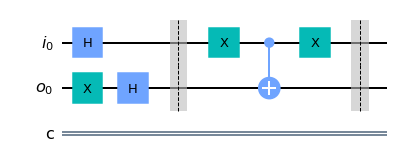

In [5]:
import random
list_options_Bob = [circuit_Bob1, circuit_Bob2, circuit_Bob3, circuit_Bob4]
circuit_Bob_choice = random.choice(list_options_Bob)

# Add the chosen circuit to the main circuit
circuit_Deutsch += circuit_Bob_choice

# Draw the circuit 
print("The circuit with Bob's chosen function")
circuit_Deutsch.draw(output="mpl")

After applying the chosen function/circuit, Bob sends back the qubits to Alice. 

The final version of the circuit


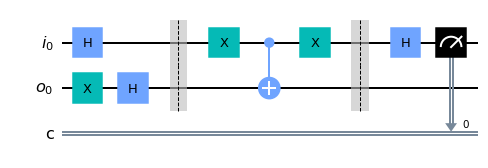

In [6]:
# Alice's final operations
circuit_Deutsch.h(input_register[0])
circuit_Deutsch.measure(input_register[0], classical_register[0])

# Draw the final version of the circuit 
print("The final version of the circuit")
circuit_Deutsch.draw(output="mpl")

In [7]:
# The execution of the circuit
counts = execute(circuit_Deutsch, simulator, shots=1).result().get_counts()

# Finding the only key/measurement outcome
measurement_result = list(counts.keys())[0]
print("The results of the measurements: {}".format(counts))
print("The final result is: {}".format(measurement_result))

# From the final measurement result, Alice understands if 
# the Bob's chosen function balanced or constant
if measurement_result == '0':
    print("Bob's chosen function was constant")
elif measurement_result == '1':
    print("Bob's chosen function was balanced")

The results of the measurements: {'1': 1}
The final result is: 1
Bob's chosen function was balanced


Note that if Alice and Bob will choose to play their "game" not with a quantum computer, but with a classical computer, then Bob should execute separately the $f(x)$ function twice for the two possible inputs. In contrast, the quantum computer can do the job with only one execution of $f(x)$. This seems not a big improvement, but suppose that the cost of running the $f(x)$ function is $1m$ dollars [[3]] (Bob rents some computation time from some company that has quantum computers and classical computers). If they are using quantum computer Bob will spend only $1m$ dollars, and if they are using the classical computer they will spend $2m$ dollars. So, the quantum computer is preferable than the classical one for playing this "game". More importantly, the Deutsch algorithm shows us the possibility of obtaining an advantage by using quantum computers. As was shown the demonstrated advantage comes from two important "tools" of quantum computation: quantum parallelism and quantum interference.

  [1]: https://www.cambridge.org/am/academic/subjects/physics/quantum-physics-quantum-information-and-quantum-computation/quantum-computation-and-quantum-information-10th-anniversary-edition?format=HB
  [2]: https://quantumcomputing.stackexchange.com/questions/9566/implementing-four-oracles-for-the-deutsch-algorithm-preferably-on-ibm-q-experie
  [3]: https://www.youtube.com/watch?v=awpnsGl08bc&list=LLEPoMdv-DZViRaaObznY_-A&index=113&t=0s
  [4]: https://courses.edx.org/courses/course-v1:MITx+8.370.2x+1T2018/course/

<h3 align="left">
3. The Deutsch-Jozsa algorithm
</h3>

Deutsch-Jozsa algorithm is the $n$ qubit version of the Deutsch algorithm. The functions now take $n$ bit strings (e.g. "0101011") as an input and return one bit output ($0$ or $1$). Bob still is allowed only to use either balanced or constant functions and Alice should find out the property of that function. Bob has two options for constant functions (for all input bit strings $x$ the $f(x) = 0$ or $f(x) = 1$) and $\begin{pmatrix} 2^n \\ 2^{n - 1} \end{pmatrix}$ options to choose a balanced function. The main steps of the algorithm are presented in the following circuit (a modified version of the Fig.1.20 from the [[1]]):

<img src="images/Deutsch_Jozsa.png" alt="drawing" width="600"/>

where $\left| 0 \right\rangle^{\otimes n}$ presents $n$ qubits in the input register all in the $\left| 0 \right\rangle$ state, $H^{\otimes n}$ is the tensor product of $n$ Hadamard gates that are applied on each qubit in that register, $M^{\otimes n}$ is $n$ measurements executed on $n$ (all) qubits in the input register. As you can see the circuit is very similar to the circuit from Deutsch algorithm. Now we will go through the steps of the Deutsch-Jozsa algorithm. After $n$ Hadamard gates applied on the input register and one Hadamard gate applied on the output register we will have [[1]]:

$$
\left| \psi_1 \right\rangle = \frac{1}{\sqrt{2^n}} \sum_{x} \left| x \right\rangle  
\frac{\left| 0 \right\rangle - \left| 1 \right\rangle}{\sqrt{2}}
$$

where the sum is over all possible $x$ bit stings. Then Bob applies chosen $f(x)$ function and obtains the $\left| \psi_2 \right\rangle$ state:

$$
\left| \psi_2 \right\rangle = \frac{1}{\sqrt{2^n}} \sum_{x} \left| x \right\rangle  
\frac{\left| 0 \oplus f(x) \right\rangle - \left| 1 \oplus f(x) \right\rangle}{\sqrt{2}}
$$

Note that $f(x)$ is either $0$ or $1$ for a given $x$, so:

\begin{align*}
&\text{if f(x) = 0}\;\;\;  (+1)\left| x \right\rangle  
\frac{\left| 0 \right\rangle - \left| 1 \right\rangle}{\sqrt{2}}
\\
&\text{if f(x) = 1}\;\;\;  (-1)\left| x \right\rangle  
\frac{\left| 0 \right\rangle - \left| 1 \right\rangle}{\sqrt{2}}
\end{align*}

By taking into account these expressions the $\left| \psi_2 \right\rangle$ state can be presented in the following form:

$$
\left| \psi_2 \right\rangle = \frac{1}{\sqrt{2^n}} \sum_{x} (-1)^{f(x)}\left| x \right\rangle  
\frac{\left| 0 \right\rangle - \left| 1 \right\rangle}{\sqrt{2}} = 
\frac{1}{\sqrt{2^n}} \sum_{x} (-1)^{f(x)}\left| x \right\rangle  
\left| - \right\rangle
$$

Bob sends back the qubits to Alice. She applies Hadamard gates on the input register and obtains $H^{\otimes n} \frac{1}{\sqrt{2^n}}\sum_{x} (-1)^{f(x)}\left| x \right\rangle$ state. This is enough to calculate what is the probability of measuring $\left|00...0 \right\rangle = \left| 0^{\otimes n} \right\rangle$ state, that will indicate whether the function is balanced or constant. For that, firstly, we should take the inner product between $\left| 0^{\otimes n} \right\rangle$ state and $H^{\otimes n} \frac{1}{\sqrt{2^n}}\sum_{x} (-1)^{f(x)}\left| x \right\rangle$ state (similar to [[4]]) in order to calculate the overlap between the states:

\begin{align*}
\left\langle 0^{\otimes n} \right| H^{\otimes n} \frac{1}{\sqrt{2^n}} &\sum_{x} (-1)^{f(x)}\left| x \right\rangle = \frac{1}{2^n}\sum_{y} \left\langle y \right|  \sum_{x} (-1)^{f(x)}\left| x \right\rangle =
\\
= 
\frac{1}{2^n} &\sum_{x,y} (-1)^{f(x)} \delta_{x,y}  = \frac{1}{2^n}\sum_{x} (-1)^{f(x)}
\end{align*}

where we took into account that $\left\langle 0^{\otimes n} \right| H^{\otimes n} =  \frac{1}{\sqrt{2^n}} \sum_{y} \left\langle y \right|$ and $\left\langle y \right| \left| x \right\rangle = \delta_{x,y}$, $\delta_{x=y} = 1$ and $\delta_{x \ne y} = 0$, because of the orthonormality of the states. The probability of measuring $\left| 0 \right\rangle^{\otimes n}$ state is equal to the square of the absolute value of the calculated overlap:

$$p_{0^{\otimes n}} = \left| \frac{1}{2^n}\sum_{x} (-1)^{f(x)} \right|^2$$

If we have a constant function ($f(x) = 1$ for all $x$ or $f(x) = 0$ for all $x$) then $p_{0^{\otimes n}} = 1$. Therefore, if the function is constant then Alice always will measure $\left| 0^{\otimes n} \right\rangle$. Otherwise, if Bob's chosen function is balanced then half of the $(-1)^{f(x)}$ terms in the sum will be equal to $-1$, and the other half will be equal to $+1$. Consequently, $p_{0^{\otimes n}} = 0$ if we have a balanced function and Alice will never measure $\left| 0^{\otimes n} \right\rangle$. If the measurement outcome yields $\left| 0^{\otimes n} \right\rangle$, Alice with certainty will know that the function was constant, otherwise, she will know that the function was balanced.

For this procedure, Bob will need to execute the circuit that corresponds to the chosen function only one time (like in the Deutsch algorithm). Classical deterministic approach for this problem will require to execute $f(x)$ function $2^{n-1} + 1$ times in the worst-case scenario. Thus Alice and Bob are happy with their quantum computer. Here we should note that if they have the possibility to play the "game" with a probabilistic classical computer, then the advantage of choosing quantum computer will not be as dramatic as it is in comparison with the classical deterministic approach [[1]].

For simplicity, in the implementation, we will allow Bob to use only two functions: one is a constant $f(x) = 1$ function, that can be implemented by applying $X$ gate on the output qubit, and the second one is the function that we have used in the quantum parallelism paragraph that is actually an example of a balanced function. The implementation is done for 4 qubits:

  [1]: https://www.cambridge.org/am/academic/subjects/physics/quantum-physics-quantum-information-and-quantum-computation/quantum-computation-and-quantum-information-10th-anniversary-edition?format=HB
  [2]: https://quantumcomputing.stackexchange.com/questions/9566/implementing-four-oracles-for-the-deutsch-algorithm-preferably-on-ibm-q-experie
  [3]: https://www.youtube.com/watch?v=awpnsGl08bc&list=LLEPoMdv-DZViRaaObznY_-A&index=113&t=0s
  [4]: https://courses.edx.org/courses/course-v1:MITx+8.370.2x+1T2018/course/

In [8]:
# Alice: qubit preparation
input_register = QuantumRegister(3, "i")
output_register = QuantumRegister(1, "o")
classical_register = ClassicalRegister(3, "c")

circuit_Deutsch_Jozsa = QuantumCircuit(input_register, output_register, classical_register)

# Prepare the qubit in the output register in the |1> state
circuit_Deutsch_Jozsa.x(output_register[0])

# Hadamard gates on both input and output registers
circuit_Deutsch_Jozsa.h(input_register) # Hadamard gate is applied to all qubits in the input_register
circuit_Deutsch_Jozsa.h(output_register[0])

# Add a barrier
circuit_Deutsch_Jozsa.barrier()

Alice sends the qubits to Bob. Bob applies $f(x) = 1$ constant function and sends back the qubits to Alice. Alice measures the qubits in the input register and finds out the property of the function (constant or balanced):

In [9]:
# A function that will help Alice to define if
# the chosen function was balanced or constant 
def is_balanced_or_constant(circuit, bakend):
    """
    checks if the given circuit implements
    a balanced function or balanced
    
    :param circuit: QuantumCircuit that implements either 
                    balanced or constant function
    :param bakend: specifies the quantum simulator or 
                   hardware that will be used
    """
    # The execution of the circuit
    counts = execute(circuit, bakend, shots=1).result().get_counts()

    # Finding the only key/measurement outcome
    measurement_result = list(counts.keys())[0]
    print("The results of the measurements: {}".format(counts))
    print("The final result is: {}".format(measurement_result))

    # Alice checks if Bob's function was constant or balanced
    if '000' in counts:
        print("Bob's chosen function was constant")
    else:
        print("Bob's chosen function was balanced")

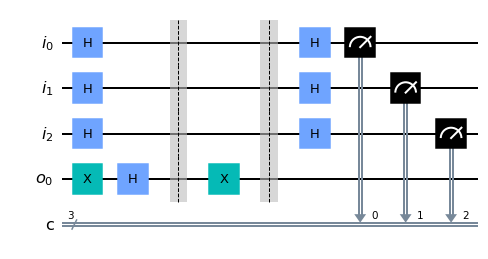

In [10]:
# Circuit for the constant function
circtuit_Deutsch_Jozsa_constant  = QuantumCircuit(input_register, output_register, classical_register)
circtuit_Deutsch_Jozsa_constant += circuit_Deutsch_Jozsa

# Implementing the f(x) = 1 constant function
circtuit_Deutsch_Jozsa_constant.x(output_register[0])

# Add a barrier
circtuit_Deutsch_Jozsa_constant.barrier()

# Final Hadamard gates applied on all qubits in the input register
circtuit_Deutsch_Jozsa_constant.h(input_register)

# Measurements executed for all qubits in the input register
circtuit_Deutsch_Jozsa_constant.measure(input_register, classical_register)

# Draw the circuit
circtuit_Deutsch_Jozsa_constant.draw(output="mpl")

In [11]:
# Alice uses is_balanced_or_constant() function
is_balanced_or_constant(circtuit_Deutsch_Jozsa_constant, simulator)

The results of the measurements: {'000': 1}
The final result is: 000
Bob's chosen function was constant


Now we will do the same calculations but for a balanced $f(x)$ function that we have used in the quantum parallelism paragraph.

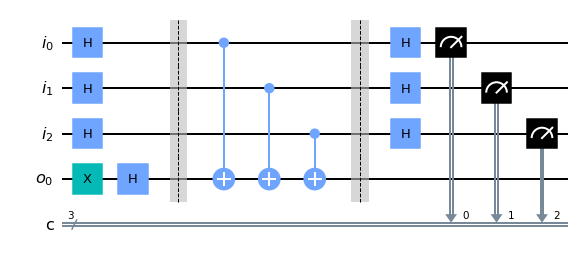

In [12]:
# Circuit for the balanced case
circtuit_Deutsch_Jozsa_balanced  = QuantumCircuit(input_register, output_register, classical_register)
circtuit_Deutsch_Jozsa_balanced += circuit_Deutsch_Jozsa

# implementing the balanced function
circtuit_Deutsch_Jozsa_balanced.cx(input_register[0], output_register[0])
circtuit_Deutsch_Jozsa_balanced.cx(input_register[1], output_register[0])
circtuit_Deutsch_Jozsa_balanced.cx(input_register[2], output_register[0])

# add a barrier
circtuit_Deutsch_Jozsa_balanced.barrier()

# final Hadamard gates applied on all qubits in the input register
circtuit_Deutsch_Jozsa_balanced.h(input_register)


# measurements executed for all qubits in the input register
circtuit_Deutsch_Jozsa_balanced.measure(input_register, classical_register)

# draw the circuit
circtuit_Deutsch_Jozsa_balanced.draw(output="mpl")

In [13]:
# Alice uses is_balanced_or_constant() function
is_balanced_or_constant(circtuit_Deutsch_Jozsa_balanced, simulator)

The results of the measurements: {'111': 1}
The final result is: 111
Bob's chosen function was balanced


**[[Homepage][5]]**

<h3 align="left">
References
</h3>

[[1]] [M.A. Nielsen, I.L. Chuang, Cambridge University Press New York, "Quantum Computation and Quantum Information: 10th Anniversary Edition
10th" (2011)][1]

[[2]] [A question about implementing four oracles for the Deutsch algorithm in the Quantum Computing Stack Exchange][2]

[[3]] [Video lecture "24. Entanglement — QComputing, EPR, and Bell" by Allan Adams: starting from 50:20 the Deutsch algorithm][3]

[[4]] [edx course: Quantum Information Science I, Part 2][4]


  [1]: https://www.cambridge.org/am/academic/subjects/physics/quantum-physics-quantum-information-and-quantum-computation/quantum-computation-and-quantum-information-10th-anniversary-edition?format=HB
  [2]: https://quantumcomputing.stackexchange.com/questions/9566/implementing-four-oracles-for-the-deutsch-algorithm-preferably-on-ibm-q-experie
  [3]: https://www.youtube.com/watch?v=awpnsGl08bc&list=LLEPoMdv-DZViRaaObznY_-A&index=113&t=0s
  [4]: https://courses.edx.org/courses/course-v1:MITx+8.370.2x+1T2018/course/
  [5]: https://github.com/DavitKhach/quantum-algorithms-tutorials
  [6]: https://nbviewer.jupyter.org/github/DavitKhach/quantum-algorithms-tutorials/blob/master/quantum_parallelism_Deutsch_Jozsa.ipynb